Fernando A Marina Urriola s233144

Gabriele Turetta s233124

Course: 02806 Social Data Analysis and Visualization - DTU - Technical University of Denmark

 


# Explainer jupyter notebook final project

## 1. Motivation
1. What is your dataset?
> Data on CO2 and Greenhouse Gas Emissions by Our World in Data. The dataset we are using is a a collection of key metrics maintained by Our World in Data. It includes data on CO2 emissions (annual, per capita, cumulative and consumption-based), other greenhouse gases, energy mix, and other relevant metrics. 
In recent years governments and agencies have imposed severe measures on companies that pollute the environment. This in turn has affected citizens, either by increasing the price of products or by forcing the user to use recyclable materials such as wooden cutlery or cardboard straws. Our main motivation with this project is to find out if the situation with pollution has improved over the years (thanks to the measures taken by governments and organisations) or if it remains the same as in the past. Also, we would like to see what the effect of a single user is on the overall pollution computation.

2. Why did you choose this/these particular dataset(s)?
>We have chosen this dataset because it motivates us to understand whether the legal measures taken against the companies are having an effect globally. Furthermore, we are an environmentally conscious group and we wanted to develop a project that has activism, that is to say, that our project would serve for future generations; helping with our visualisations and research to understand more and better what the current situation is. 

3. What was your goal for the end user's experience?
>Our ultimate goal in relation to the user in developing this project is to make the user aware that the planet is in a serious situation and we must take action. With the visualisations and exploratory data analysis we will try to make the user understand that they should be more aware of the state of the planet and take action as soon as possible to reduce their carbon footprint or CO2 emissions.

## 2. Basis stats
Let's understand the dataset better
1. Write about your choices in data cleaning and preprocessing
2. Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

In [41]:
# imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import missingno as msno


In [42]:
df = pd.read_csv('./data/co2data.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

As it can be seen, there a lot of variables in the dataset, let's deep into the df

In [44]:
df.head(8)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
5,Afghanistan,1855,AFG,3835192.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.162,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6,Afghanistan,1856,AFG,3852417.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.162,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
7,Afghanistan,1857,AFG,3869714.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.162,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [45]:
df.shape

(48058, 79)

There are 48058 (rows) and 79 attributes (columns).

We are of course not going to use all 79 attributes in this project, so deriving a subset containing only the columns we need is appropriate. This subset is stored in its own file, so a much smaller file needs to be loaded into RAM when running this project.

Lets eplore the Null values

<Figure size 2000x800 with 0 Axes>

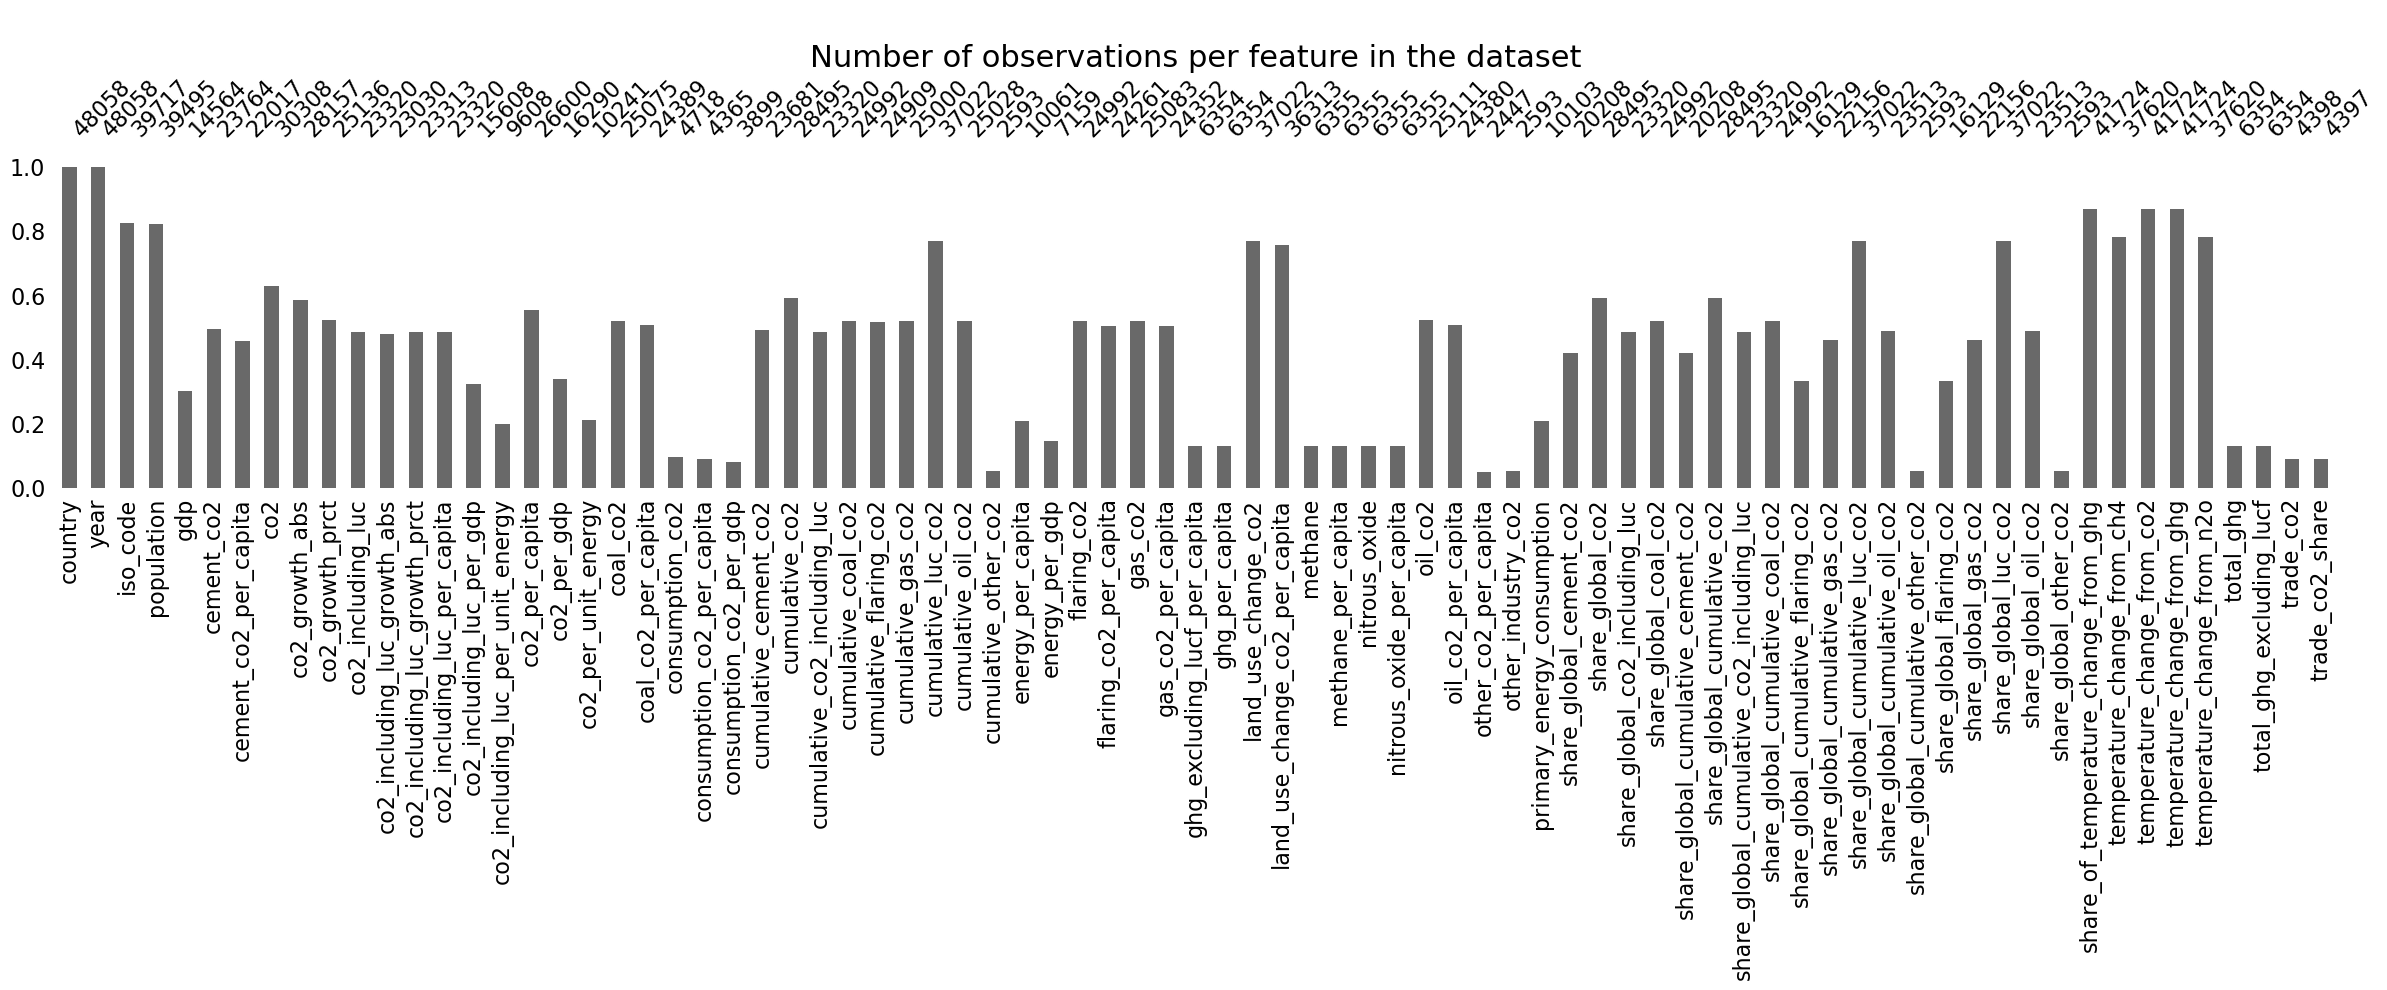

In [46]:
plt.figure(figsize=(20,8))
msno.bar(df)
plt.title('\nNumber of observations per feature in the dataset', fontsize=22)
plt.tight_layout()
plt.show()

As it can be seen there are a lot of variables with a high percentage of NaN values. We are going to set up a threshold in apprx 50%. All variables that have equal or more than 50% of NaN values will be removed. And we will save the other ones in another dataset.

In [47]:
df = df.dropna(axis=1, thresh=0.5 * len(df))

In [48]:
df.shape

(48058, 35)

<Figure size 2000x800 with 0 Axes>

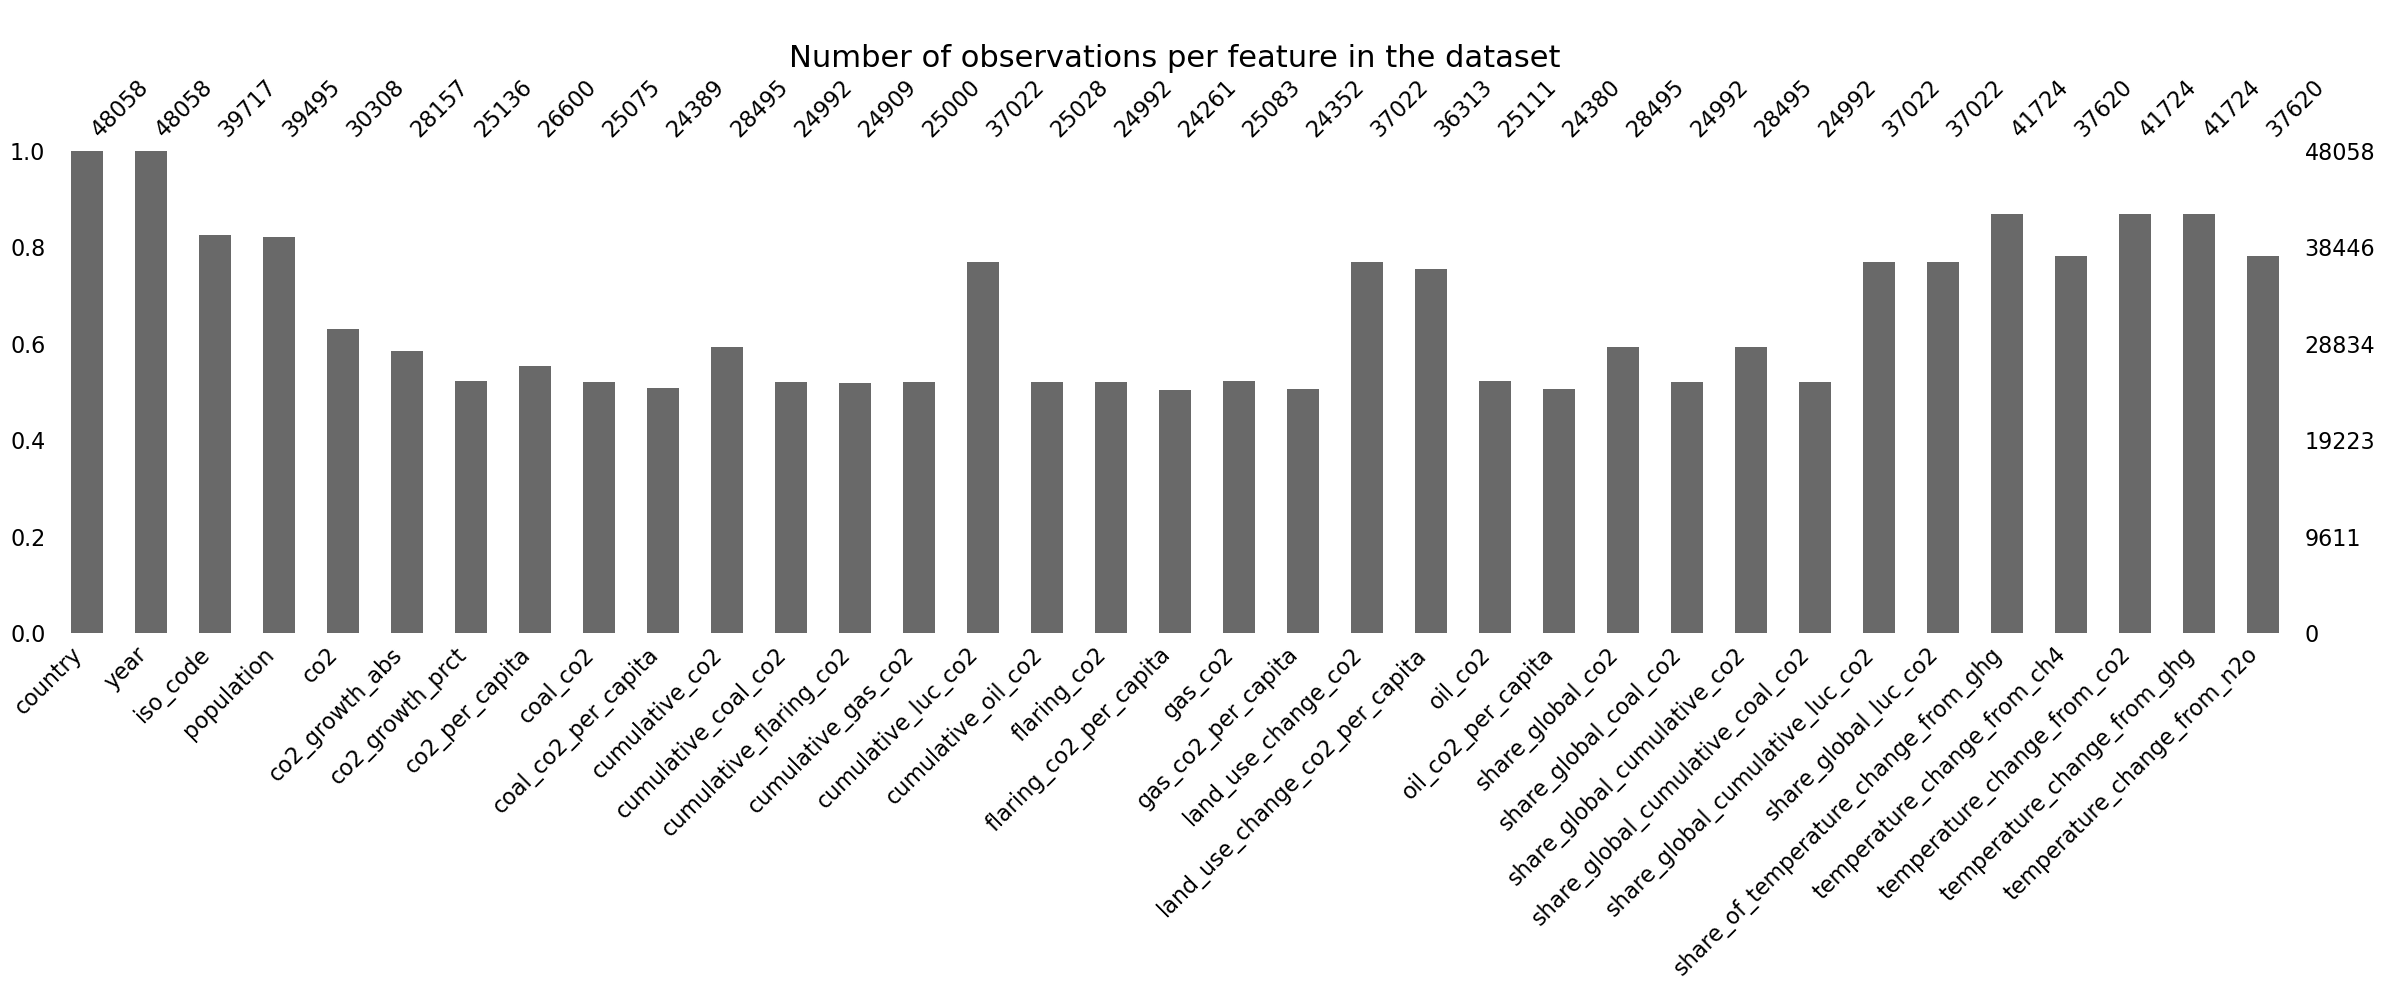

In [49]:
plt.figure(figsize=(20,8))
msno.bar(df)
plt.title('\nNumber of observations per feature in the dataset', fontsize=22)
plt.tight_layout()
plt.show()

Now our data looks more 'clean' and we have reduced the amount of columns from 79 to 36, which makes our life easier.
We will save this resultng dataset in another csv file to work with it.

In [36]:
df.to_csv('co2data_clean.csv')

**The output from the above pandas command is a 7,12MB csv file, which is around a 57% reduction in file size. Importing this CSV file into a pandas dataframe and working with this now is going to make the job much easier.**

Now let's continue with the preprocessing

In [37]:
df = pd.read_csv('./data/co2data_clean.csv')

In [38]:
df.shape

(48058, 36)

In [52]:
df.isnull().sum()*100/df.isnull().count()

country                                  0.000000
year                                     0.000000
iso_code                                17.356111
population                              17.818053
co2                                     36.934537
co2_growth_abs                          41.410379
co2_growth_prct                         47.696533
co2_per_capita                          44.650214
coal_co2                                47.823463
coal_co2_per_capita                     49.250905
cumulative_co2                          40.707062
cumulative_coal_co2                     47.996171
cumulative_flaring_co2                  48.168879
cumulative_gas_co2                      47.979525
cumulative_luc_co2                      22.963919
cumulative_oil_co2                      47.921262
flaring_co2                             47.996171
flaring_co2_per_capita                  49.517250
gas_co2                                 47.806817
gas_co2_per_capita                      49.327895


Indeed, we still have a lot of missing values. In order to solve this problem we can tackle it with differents solutions. Replacing them with mean, mode, median, interpolation, imputation etc...

## 3. Data analysis
1. Describe your data analysis and explain what you've learned about the dataset.
2. If relevant, talk about your machine-learning.

## 4. Genre
1. Which genre of data story did you use?
2. Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
3. Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

## 5. Visualizations
1. Explain the visualizations you've chosen.
2. Why are they right for the story you want to tell?

## 6. Discussion 
Think critically about your creation
1. What went well?
2. What is still missing? What could be improved?, Why?

## 7. Contributions 
1. Who did what?
2. You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).

It is not OK simply to write "All group members contributed equally".

## 8. References